# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

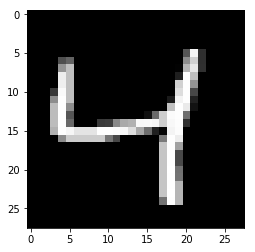

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784], name= 'inputs')
targets_ = tf.placeholder(tf.float32, [None,784], name= 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output' )

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_ , logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6888
Epoch: 1/20... Training loss: 0.6850
Epoch: 1/20... Training loss: 0.6806
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6685
Epoch: 1/20... Training loss: 0.6602
Epoch: 1/20... Training loss: 0.6503
Epoch: 1/20... Training loss: 0.6417
Epoch: 1/20... Training loss: 0.6281
Epoch: 1/20... Training loss: 0.6143
Epoch: 1/20... Training loss: 0.6014
Epoch: 1/20... Training loss: 0.5836
Epoch: 1/20... Training loss: 0.5671
Epoch: 1/20... Training loss: 0.5516
Epoch: 1/20... Training loss: 0.5343
Epoch: 1/20... Training loss: 0.5161
Epoch: 1/20... Training loss: 0.4965
Epoch: 1/20... Training loss: 0.4798
Epoch: 1/20... Training loss: 0.4578
Epoch: 1/20... Training loss: 0.4430
Epoch: 1/20... Training loss: 0.4251
Epoch: 1/20... Training loss: 0.4131
Epoch: 1/20... Training loss: 0.4072
Epoch: 1/20... Training loss: 0.3828
Epoch: 1/20... Training loss: 0.3743
Epoch: 1/20... Training loss: 0.3685
E

Epoch: 1/20... Training loss: 0.2007
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1929
E

Epoch: 2/20... Training loss: 0.1602
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1626
Epoch: 2/20... Training loss: 0.1645
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1649
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1633
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1612
E

Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1452
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1335
E

Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1255
E

Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1201
E

Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1091
E

Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1080
E

Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1079
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1026
E

Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0998
E

Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0993
E

Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.1001
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0891
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0989
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0876
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.1002
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.1012
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0889
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

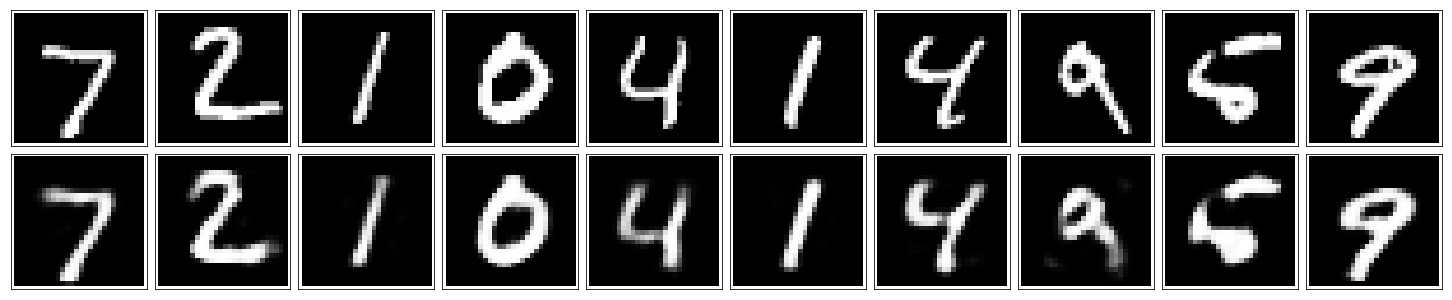

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.